# Fig 2 - introducing mixtures

## Overview:

<!-- N sprays most important thing for resistance

Effect of changes to initial distributions - variance and mean

(maths in appendix proves it)

And resistance increases with dose

Then can say simple things about resistance management, but yield and econ more complex (figs 2 onwards address)

FIG:
1. Mean of dist vs severity in diff cases (doses / sprays)
2. Mean of dist vs n sprays/dose
3. Variance vs change in following year or vs mean in year X -->

## Required data:

Uses `cluster/f2_mixtures.submit` which produces `outputs/fig2/300.csv`.

In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib widget

In [6]:
import pandas as pd

import copy

import seaborn as sns

import numpy as np
import matplotlib.pyplot as plt

import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px


from plots2.fns import (
    standard_layout,
    corner_annotations_colwise,
    corner_annotations_rowwise,
    get_text_annotation
)

# from poly2.utils import get_dist_mean, edge_values
# from poly2.run import simulations_run, no_joblib_simulations_run
# from poly2.config import Config

In [3]:
COLZ = sns.color_palette('muted').as_hex()

In [4]:
from poly2.config import Config, ConfigMixture
from poly2.simulator import SimulatorOneTrait, SimulatorBothTraits, SimulatorMixture

In [89]:
# doses = np.linspace(0,1,11)
doses = np.linspace(0,1,6)

In [90]:
def yield_plot(yield_list, title):
    f, ax = plt.subplots()

    sns.set_palette("rocket", n_colors=len(yield_list))

    for ind, dt in enumerate(yield_list):
        ax.plot(dt, label=f'Dose = {doses[ind]:.1f}')

    ax.set_title(title)

    ax.set_xlabel('Year')
    ax.set_ylabel('Yield')

    ax.legend()
    
    return f

In [91]:
def av_yield_plot(yield_list, title):
    f, ax = plt.subplots()

    sns.set_palette("rocket", n_colors=len(yield_list))

    for ind, dt in enumerate(yield_list):
        av_yld = np.cumsum(dt) / np.arange(1, 1+len(dt))
        ax.plot(av_yld, label=f'Dose = {doses[ind]:.1f}')

    ax.set_title(title)

    ax.set_xlabel('Year')
    ax.set_ylabel('Average yield from start')

    ax.legend()
    
    return f

# Single

In [10]:
cf = Config()

CONFIG
------
I0s = [0.00985703, 0.00985703, 0.00985703, 0.00985 ...
betas = [0.00786542, 0.00786542, 0.00786542, 0.007 ...
decay_rate = None
doses = [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1 ...
fungicide_mixture = False
host_on = None
k_b = 0.8431572316700577
k_mu = 9.44286788381916
l_b = 6.585357214619326
l_mu = 0.8089358816813786
mutation_proportion = 1.234375e-05
mutation_scale_fung = 0.0019836158401698102
mutation_scale_host = 0.0019836158401698102
n_k = 50
n_l = 50
n_years = 15
replace_cultivars = None
sprays = None
type = single



In [62]:
conf_plot = copy.deepcopy(cf)

data_list = []

for dd in doses:
    conf_plot.doses = dd*np.ones(conf_plot.n_years)
    
    data = SimulatorOneTrait(conf_plot).run_model()
    
    data_list.append(data['yield_vec'])

In [63]:
data_list

[array([8.81039122, 8.81039122, 8.81039122, 8.81039122, 8.81039122,
        8.81039122, 8.81039122, 8.81039122, 8.81039122, 8.81039122,
        8.81039122, 8.81039122, 8.81039122, 8.81039122, 8.81039122]),
 array([9.54171516, 9.54086271, 9.53973743, 9.53829919, 9.53647505,
        9.53408764, 9.53098994, 9.52698479, 9.52172632, 9.51487244,
        9.5059701 , 9.49449183, 9.47987266, 9.46158917, 9.43928858]),
 array([9.93582923, 9.93386256, 9.93085433, 9.92616314, 9.91874049,
        9.90680322, 9.88765539, 9.85743477, 9.81187092, 9.74853683,
        9.6704122 , 9.58697019, 9.50961316, 9.44519104, 9.39442142]),
 array([10.1505951 , 10.14811917, 10.14372501, 10.13566669, 10.12046966,
        10.09158075, 10.03878418,  9.95249499,  9.83707409,  9.71718418,
         9.61706365,  9.542062  ,  9.48575853,  9.4410557 ,  9.40350641]),
 array([10.2745928 , 10.27201909, 10.26693543, 10.25627177, 10.23303565,
        10.18311545, 10.08793463,  9.94875212,  9.80580667,  9.69408278,
         9.6134

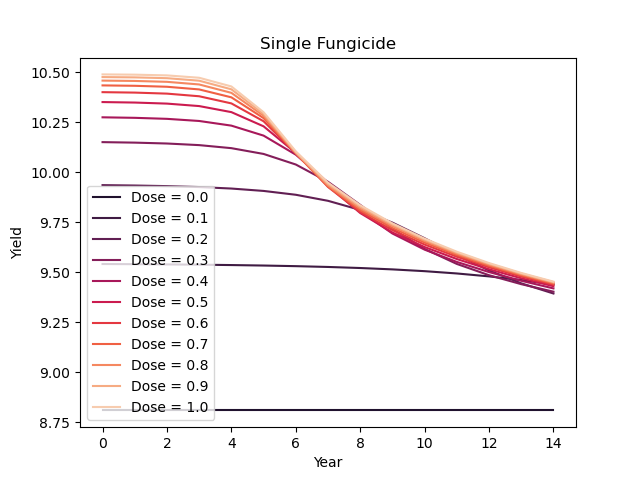

In [64]:
f = yield_plot(data_list, 'Single Fungicide')

In [65]:
f.savefig('../figures/rough/yld.jpg')

## Av yld

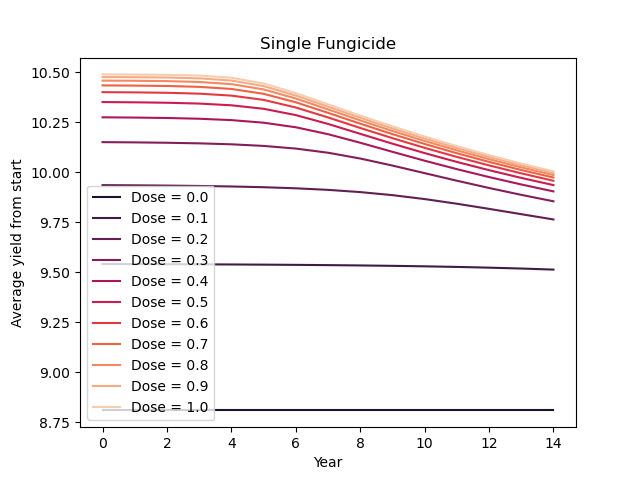

In [67]:
f = av_yield_plot(data_list, 'Single Fungicide')

In [20]:
f.savefig('../figures/rough/av_yld.jpg')

# Mixture

In [27]:
cfm = ConfigMixture()

CONFIG
------
A_b = 0.8431572316700577
A_mu = 9.44286788381916
B_b = 0.8431572316700577
B_mu = 9.44286788381916
I0s = [0.00985703, 0.00985703, 0.00985703, 0.00985 ...
betas = [0.00786542, 0.00786542, 0.00786542, 0.007 ...
decay_rate_A = None
decay_rate_B = None
doses_A = [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., ...
doses_B = [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., ...
fungicide_mixture = True
host_on = [False]
mutation_proportion = 1.234375e-05
mutation_scale_fung = 0.0019836158401698102
mutation_scale_host = 0.0019836158401698102
n_k = 50
n_years = 15
sprays = None
type = single



In [29]:
cfm_plot = copy.deepcopy(cfm)

data_list_m = []

doses = np.linspace(0,1,11)

for dd in doses:
    cfm_plot.doses_A = dd*np.ones(cfm_plot.n_years)
    cfm_plot.doses_B = dd*np.ones(cfm_plot.n_years)
    
    data = SimulatorMixture(cfm_plot).run_model()
    
    data_list_m.append(data['yield_vec'])

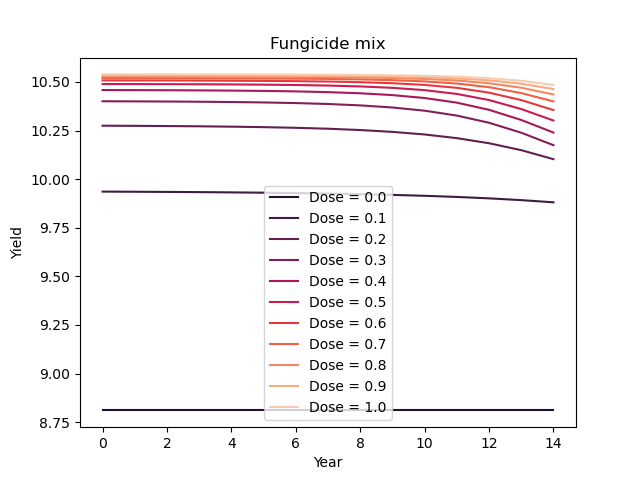

In [42]:
f = yield_plot(data_list_m, 'Fungicide Mix')

In [34]:
f.savefig('../figures/rough/yld_mix.jpg')

## Av yld

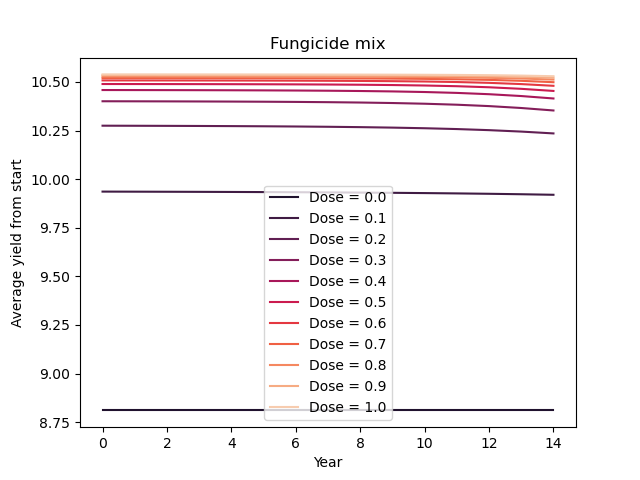

In [44]:
f = av_yield_plot(data_list_m, 'Fungicide Mix')

In [36]:
f.savefig('../figures/rough/av_yld_mix.jpg')

# Single, diff dist

In [138]:
from poly2.utils import beta_dist, gamma_dist
from scipy import signal

In [174]:
cfd = Config()

CONFIG
------
I0s = [0.00985703, 0.00985703, 0.00985703, 0.00985 ...
betas = [0.00786542, 0.00786542, 0.00786542, 0.007 ...
decay_rate = None
doses = [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1 ...
fungicide_mixture = False
host_on = None
k_b = 0.8431572316700577
k_mu = 9.44286788381916
l_b = 6.585357214619326
l_mu = 0.8089358816813786
mutation_proportion = 1.234375e-05
mutation_scale_fung = 0.0019836158401698102
mutation_scale_host = 0.0019836158401698102
n_k = 50
n_l = 50
n_years = 15
replace_cultivars = None
sprays = None
type = single



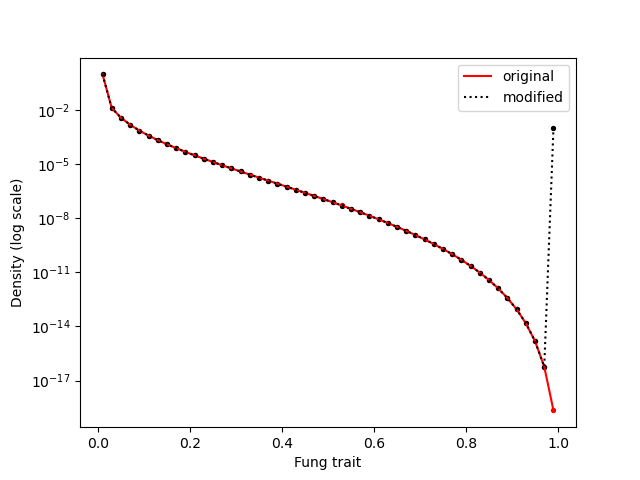

In [175]:
f, ax = plt.subplots()

b = cfd.k_b
a = cfd.k_b*cfd.k_mu

old_dist = gamma_dist(sim.n_k, a, b)

init_dist = (
    0.999* old_dist +
    0.001*signal.unit_impulse(sim.n_k, sim.n_k-1)
)

ax.plot(sim.k_vec, old_dist, label='original', c='r')
ax.scatter(sim.k_vec, old_dist, c='r', s=8)

ax.scatter(sim.k_vec, init_dist, c='k', s=8)
ax.plot(sim.k_vec, init_dist, label='modified', ls=':', c='k')

ax.set_xlabel('Fung trait')
ax.set_ylabel('Density (log scale)')

ax.legend()

ax.set_yscale('log')

In [173]:
f.savefig('../figures/rough/modified_dist.jpg')

In [146]:
doses = [0.5, 1]

In [176]:
conf_plot = copy.deepcopy(cfd)

data_list_d = []

for dd in doses:
    conf_plot.doses = dd*np.ones(conf_plot.n_years)
    
    sim = SimulatorOneTrait(conf_plot)

    sim.initial_k_dist = init_dist
    
    data = sim.run_model()
    
    data_list_d.append(data['yield_vec'])

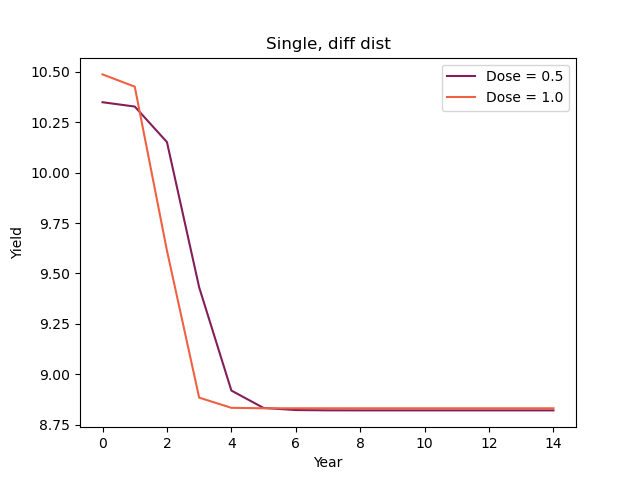

In [177]:
f = yield_plot(data_list_d, 'Single, diff dist')

In [178]:
f.savefig('../figures/rough/yld_diff_dist.jpg')

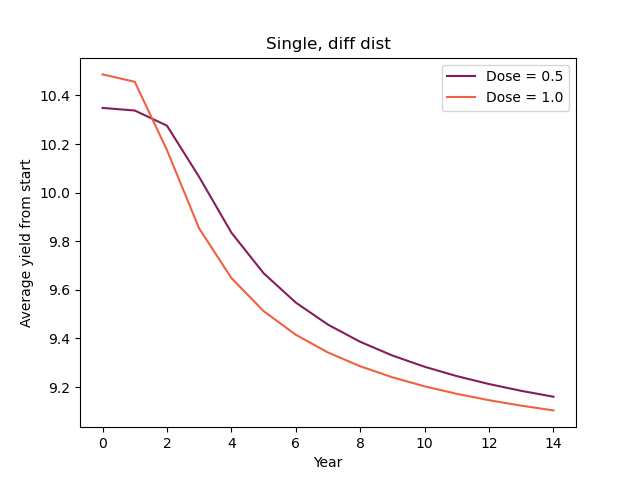

In [179]:
f = av_yield_plot(data_list_d, 'Single, diff dist')

In [153]:
f.savefig('../figures/rough/av_yld_diff_dist.jpg')

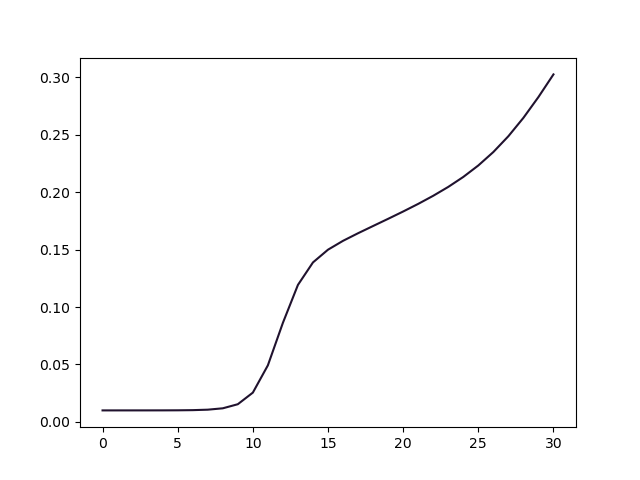

In [77]:
f, ax = plt.subplots()

ax.plot(data['fung_mean'])

# Mixtures

In [230]:
cfdm = ConfigMixture(decay_rate_A=6.91e-3, decay_rate_B=1.11e-1)
# cfdm = ConfigMixture()

CONFIG
------
A_b = 0.8431572316700577
A_mu = 9.44286788381916
B_b = 0.8431572316700577
B_mu = 9.44286788381916
I0s = [0.00985703, 0.00985703, 0.00985703, 0.00985 ...
betas = [0.00786542, 0.00786542, 0.00786542, 0.007 ...
decay_rate_A = 0.00691
decay_rate_B = 0.111
doses_A = [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., ...
doses_B = [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., ...
fungicide_mixture = True
host_on = [False]
mutation_proportion = 1.234375e-05
mutation_scale_fung = 0.0019836158401698102
mutation_scale_host = 0.0019836158401698102
n_k = 50
n_years = 15
sprays = None
type = single



In [215]:
init_dist2 = (
    0.999* old_dist +
    0.001*signal.unit_impulse(sim.n_k, sim.n_k-1)
)

In [231]:
conf_plot = copy.deepcopy(cfdm)

data_list_dm = []

for dd in doses:
    conf_plot.doses_A = dd*np.ones(conf_plot.n_years)
    conf_plot.doses_B = dd*np.ones(conf_plot.n_years)
    
    sim = SimulatorMixture(conf_plot)

    sim.initial_fA_dist = init_dist2
    sim.initial_fB_dist = init_dist2
    
    data = sim.run_model()
    
    data_list_dm.append(data['yield_vec'])

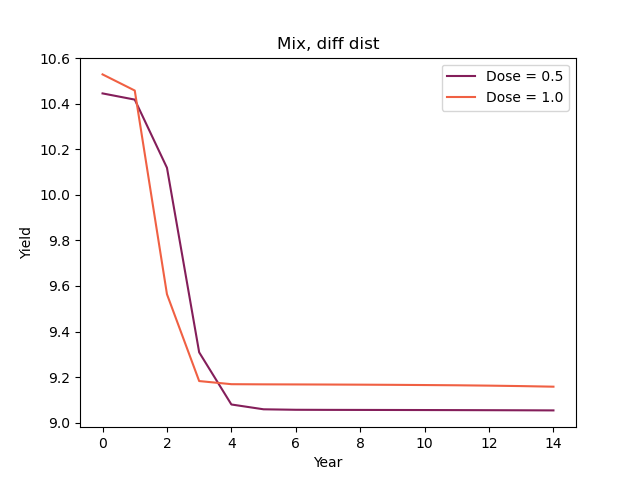

In [217]:
f = yield_plot(data_list_dm, 'Mix, diff dist')

In [232]:
f.savefig('../figures/rough/yld_mix_diff_dist.jpg')

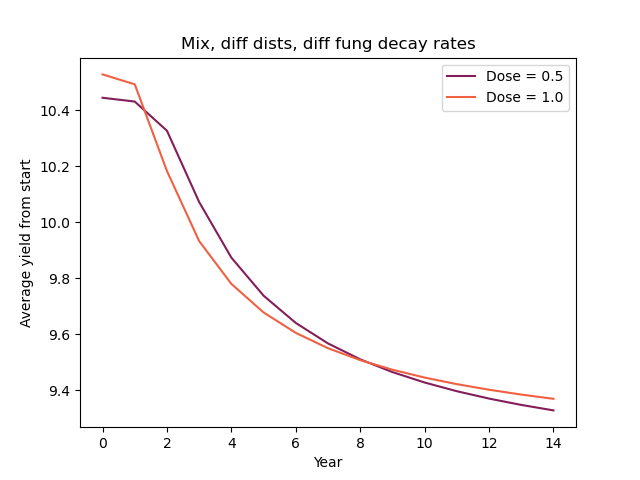

In [233]:
f = av_yield_plot(data_list_dm, 'Mix, diff dists, diff fung decay rates')

In [234]:
f.savefig('../figures/rough/av_yld_mix_diff_dist.jpg')

# Complete monogenic analogy

In [260]:
# cfdm = ConfigMixture(decay_rate_A=6.91e-3, decay_rate_B=1.11e-1)
cfdm = ConfigMixture(n_years=20)
cfdm.mutation_proportion = 1e-8
cfdm.mutation_scale_fung = 1e-8

CONFIG
------
A_b = 0.8431572316700577
A_mu = 9.44286788381916
B_b = 0.8431572316700577
B_mu = 9.44286788381916
I0s = [0.00985703, 0.00985703, 0.00985703, 0.00985 ...
betas = [0.00786542, 0.00786542, 0.00786542, 0.007 ...
decay_rate_A = None
decay_rate_B = None
doses_A = [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., ...
doses_B = [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., ...
fungicide_mixture = True
host_on = [False]
mutation_proportion = 1.234375e-05
mutation_scale_fung = 0.0019836158401698102
n_k = 50
n_years = 20
sprays = None
type = single



In [261]:
pr = 1e-5

init_dist3 = (
    (1-pr)*signal.unit_impulse(sim.n_k, 4) +
    pr*signal.unit_impulse(sim.n_k, sim.n_k-1)
)

Text(0.5, 1.0, 'Fungicide distribution, monogenic analogy')

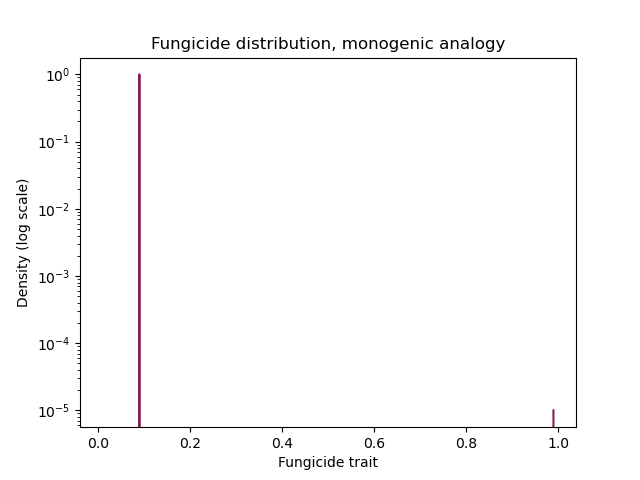

In [271]:
f, ax = plt.subplots()

ax.plot(sim.k_vec, init_dist3)

ax.set_yscale('log')

ax.set_xlabel('Fungicide trait')
ax.set_ylabel('Density (log scale)')

ax.set_title('Fungicide distribution, monogenic analogy')

In [272]:
f.savefig('../figures/rough/mono_dist.jpg')

In [262]:
conf_plot = copy.deepcopy(cfdm)

data_list_dm = []

for dd in doses:
    conf_plot.doses_A = dd*np.ones(conf_plot.n_years)
    conf_plot.doses_B = dd*np.ones(conf_plot.n_years)
    
    sim = SimulatorMixture(conf_plot)

    sim.initial_fA_dist = init_dist3
    sim.initial_fB_dist = init_dist3
    
    data = sim.run_model()
    
    data_list_dm.append(data['yield_vec'])

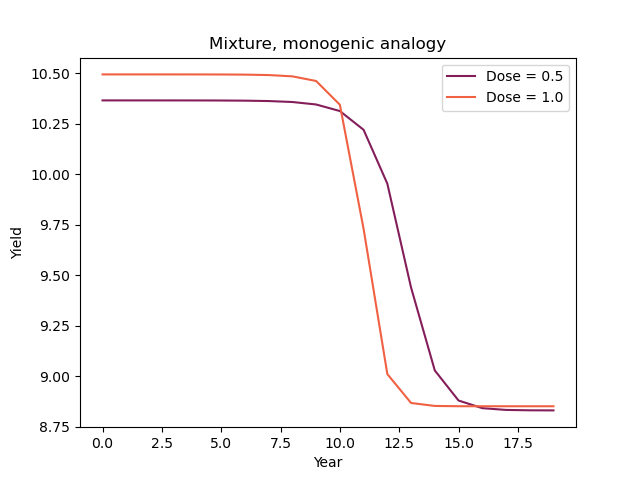

In [265]:
f = yield_plot(data_list_dm, 'Mixture, monogenic analogy')

In [266]:
f.savefig('../figures/rough/mono_analogy.jpg')

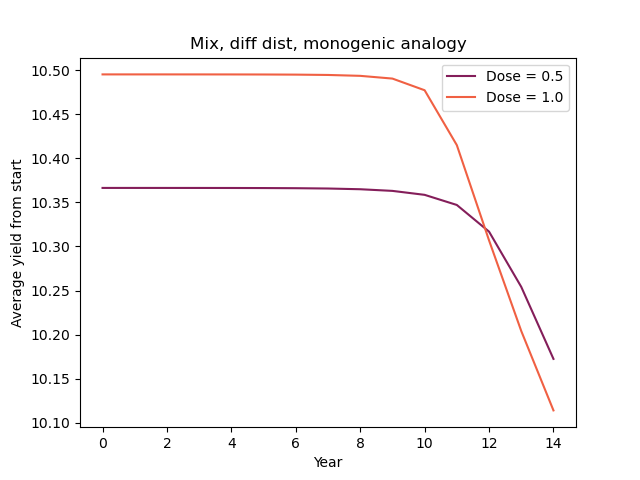

In [259]:
f = av_yield_plot(data_list_dm, 'Mix, diff dist, monogenic analogy')

# Stochasticity

In [337]:
noise = np.abs(np.random.normal(0, 1, size=sim.n_k))
noise

array([0.69923346, 0.9320469 , 0.78647077, 0.44338124, 0.14875738,
       2.01668264, 0.09167127, 0.74679916, 1.16899003, 1.2197921 ,
       1.73119449, 1.30991485, 0.20387129, 0.45652169, 0.15075478,
       0.92995311, 1.50830202, 1.13811533, 0.64031392, 0.13763352,
       0.44092043, 0.2959221 , 0.10935461, 0.67295408, 2.05151926,
       0.00877392, 0.03146151, 0.8682859 , 0.03623262, 0.1938002 ,
       0.42379022, 1.1567931 , 0.89925803, 0.92449754, 0.72559348,
       0.65304218, 0.38036433, 2.38626789, 1.60776341, 0.51623387,
       1.73282595, 2.34022299, 1.88518629, 2.06149865, 0.76571664,
       0.89075186, 0.88973284, 1.30857964, 0.75655897, 1.45680083])

In [338]:
np.logspace(-4,-1,4)

array([0.0001, 0.001 , 0.01  , 0.1   ])

In [330]:
for pr in np.logspace(-4,-1,4):
    in_dt = old_dist + pr*noise
    in_dt = in_dt / sum(in_dt)

Text(0.5, 1.0, 'Fungicide distribution')

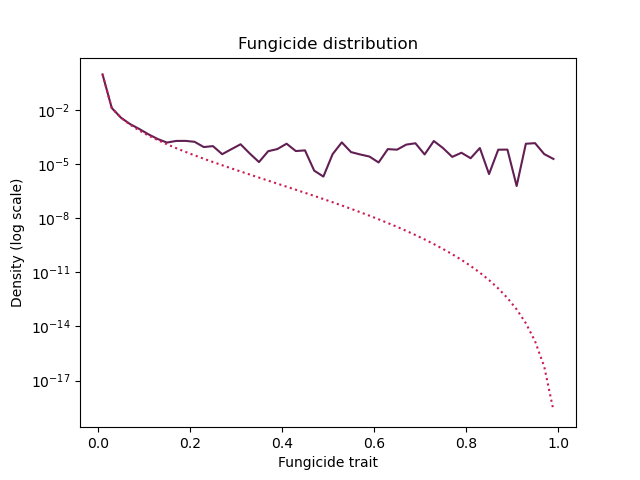

In [331]:
f, ax = plt.subplots()

ax.plot(sim.k_vec, in_dt)
ax.plot(sim.k_vec, old_dist, ls=':')

ax.set_yscale('log')

ax.set_xlabel('Fungicide trait')
ax.set_ylabel('Density (log scale)')

ax.set_title('Fungicide distribution')

In [332]:
cfs = ConfigMixture(n_years=20)

CONFIG
------
A_b = 0.8431572316700577
A_mu = 9.44286788381916
B_b = 0.8431572316700577
B_mu = 9.44286788381916
I0s = [0.00985703, 0.00985703, 0.00985703, 0.00985 ...
betas = [0.00786542, 0.00786542, 0.00786542, 0.007 ...
decay_rate_A = None
decay_rate_B = None
doses_A = [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., ...
doses_B = [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., ...
fungicide_mixture = True
host_on = [False]
mutation_proportion = 1.234375e-05
mutation_scale_fung = 0.0019836158401698102
n_k = 50
n_years = 20
sprays = None
type = single



In [355]:
doses = np.linspace(0,1,4)

In [356]:
from tqdm import tqdm

In [357]:
conf_plot = copy.deepcopy(cfs)

conf_plot.betas = 1.5*conf_plot.betas

data_list_s = []
# data_list_sa = []


for pr in tqdm(np.logspace(-6, -2, 3)):
    in_dt = old_dist + pr*noise
    in_dt = in_dt / sum(in_dt)


    for dd in doses:
        conf_plot.doses_A = dd*np.ones(conf_plot.n_years)
        conf_plot.doses_B = dd*np.ones(conf_plot.n_years)

        sim = SimulatorMixture(conf_plot)

        sim.initial_fA_dist = in_dt
        sim.initial_fB_dist = in_dt

        data = sim.run_model()

        # data_list_sa.append(data)
        data_list_s.append(data['yield_vec'])

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [02:42<00:00, 54.05s/it]


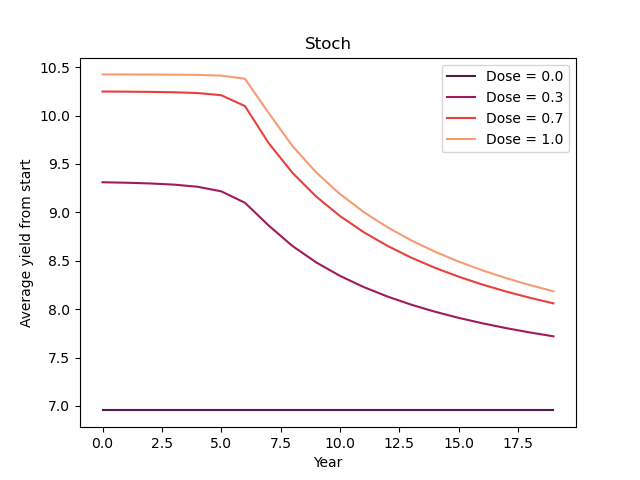

In [364]:
N = 0
n_sp = len(doses)

f = av_yield_plot(data_list_s[N*n_sp:n_sp*(N+1)], 'Stoch')